## **introduction to  Binary Logistic Regression** ##

Logistic Regression is used when the dependent variable(target) is categorical.e.g whether the patient has heart disease or not.

Essentially logistic regression model consists of two components: sigmoid function and features with weights:



In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

## **introduction to  sigmoid fuction and their derivative** ##


The sigmoid function g(z) takes features and weights z as an input and returns a result between 0 and 1. The output of the sigmoid function is an actual prediction ŷ.

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_p(x):
    return sigmoid(x) * (1-sigmoid(x))

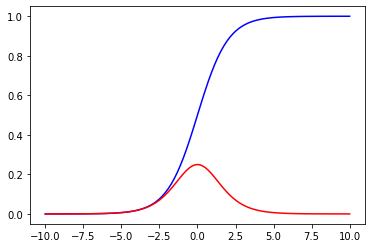

In [ ]:
X = np.linspace(-10, 10, 100)

plt.plot(X, sigmoid(X), c="b") # sigmoid in blue
fig = plt.plot(X, sigmoid_p(X), c="r") # sigmoid_p in red

Looking at the graph, we can see that the given a number n, the sigmoid function would map that number between 0 and 1.
As the value of n gets larger, the value of the sigmoid function gets closer and closer to 1 and as n gets smaller, the value of the sigmoid function is get closer and closer to 0.

due to this when the x value is small or big the slope is zero — ->then there is no learning 

## **Cost Function to  Binary Logistic Regression** ##

we use a cost function called Cross-Entropy, also known as Log Loss. Cross-entropy loss can be divided into two separate cost functions: one for y=1 and one for y=0.

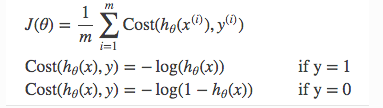

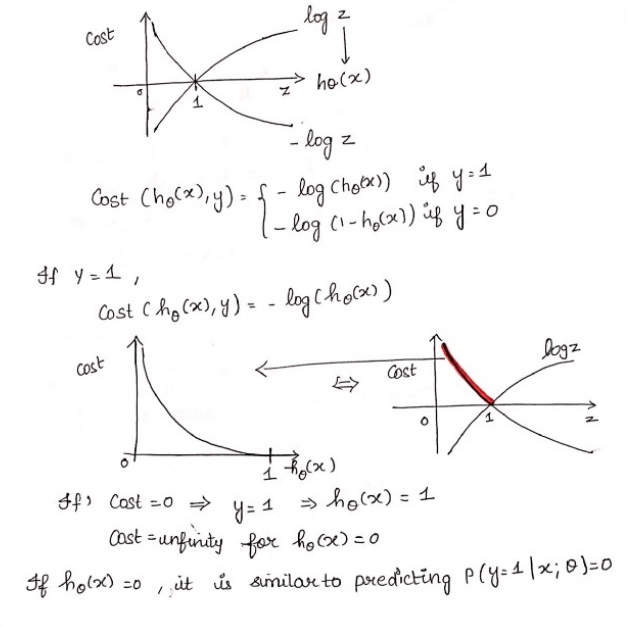


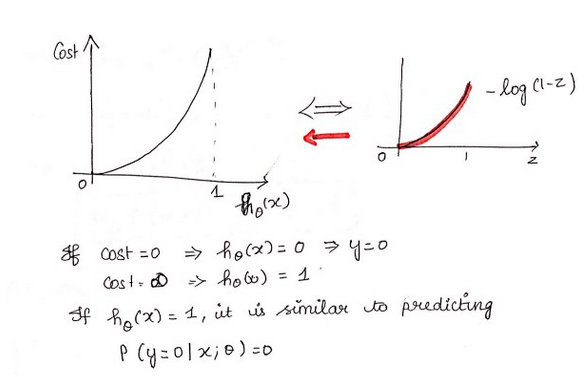

In [ ]:
import pandas as pd
import numpy as np
from numpy import log, dot, e
from numpy.random import rand
import matplotlib.pyplot as plt
np.seterr(divide = 'ignore') 
np.seterr(divide = 'warn') 

{'divide': 'ignore', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

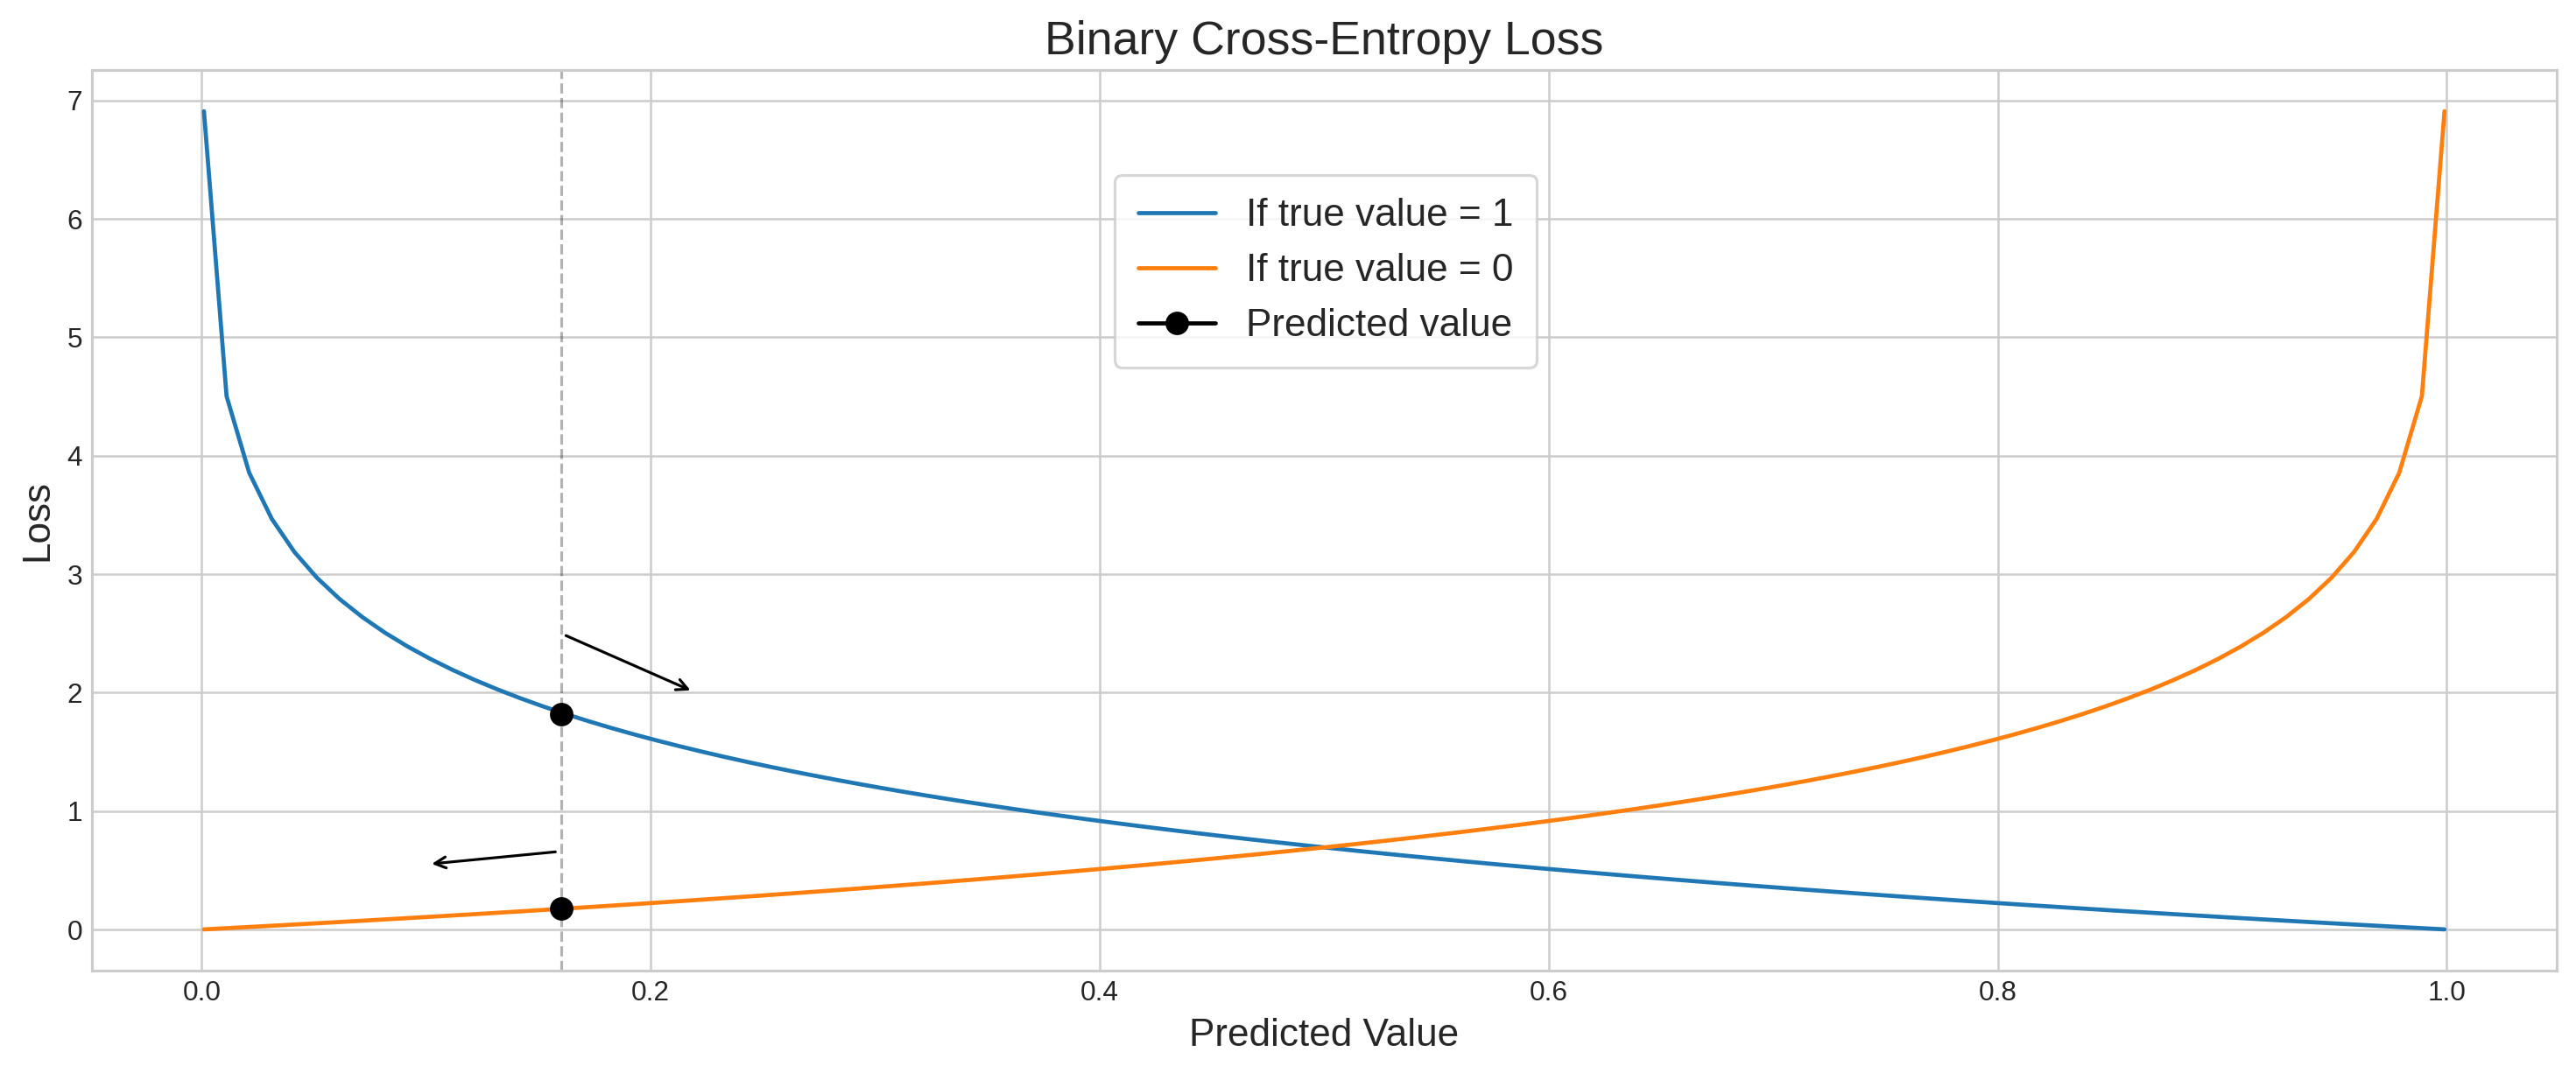

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.dpi'] = 227
plt.rcParams['figure.figsize'] = (16,6)

#plt.subplot(121)
plt.plot(np.linspace(0.001, 0.999, 100), [abs(np.log(i)) for i in np.linspace(0.001, 0.999, 100)], label='If true value = 1')
plt.plot(np.linspace(0.001, 0.999, 100), [abs(np.log(1 - i)) for i in np.linspace(0.001, 0.999, 100)], label='If true value = 0')

plt.plot(0.16, 1.818352371073392, marker='.', markersize=15, c='k', label='Predicted value')
plt.plot(0.16, 0.17708679723835707, marker='.', markersize=15, c='k')

plt.axvline(0.16, c='k', alpha=0.3, ls='--', lw=1)

plt.annotate("", xy=(0.22, 2), xytext=(0.16, 2.5), arrowprops=dict(arrowstyle="->"))
plt.annotate("", xy=(0.1, 0.55), xytext=(0.16, 0.66), arrowprops=dict(arrowstyle="->"))

plt.legend(loc=(0.415,0.67), frameon=True, fontsize=14, borderpad=.6)
plt.title('Binary Cross-Entropy Loss', fontSize=17)
plt.xlabel('Predicted Value', fontSize=14)
plt.ylabel('Loss', fontSize=14)
plt.show()

## **Gradient descent** ##

Model training is essentially minimization of the loss function. We achieve that with the Gradient Descent technique.we find derivatives of the loss function with respect to each weight. Derivatives can tell which direction and by how much we should change weight to make the model loss a bit smaller.

We use the chain rule when we need to find a derivative of a function that contains another function and so on. In our case, we have a loss function that contains a sigmoid function that contains features and weights. So there are three functions down the line and we’re going to derive them one by one.

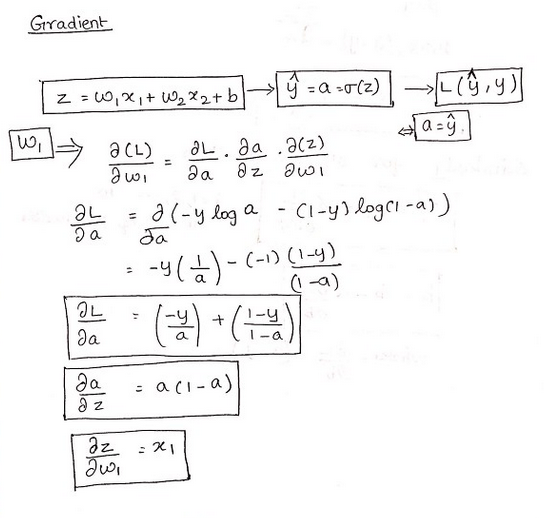


## **Training** ##


Training a model is the process of iteratively improving your prediction equation by looping through the dataset multiple times, each time updating the weight values in the direction indicated by the slope of the cost function (gradient). Training is complete when we reach an acceptable error threshold, or when subsequent training iterations fail to reduce our cost.




In [ ]:
class LogisticRegression:
    
    def sigmoid(self, z): return 1 / (1 + e**(-z))
    
    def cost_function(self, X, y, weights):                 
        z = dot(X, weights)        
        predict_1 = y * log(self.sigmoid(z))
        predict_0 = (1 - y) * log(1 - self.sigmoid(z))        
        return -sum(predict_1 + predict_0) / len(X)
    
    def fit(self, X, y, epochs=25, lr=0.05):        
        loss = []
        weights = rand(X.shape[1])
        N = len(X)
                 
        for _ in range(epochs):        
            # Gradient Descent
            y_hat = self.sigmoid(dot(X, weights))
            weights -= lr * dot(X.T,  y_hat - y) / N            
            # Saving Progress
            loss.append(self.cost_function(X, y, weights)) 
            
        self.weights = weights
        self.loss = loss
    
    def predict(self, X):        
        # Predicting with sigmoid function
        z = dot(X, self.weights)
        # Returning binary result
        return [1 if i > 0.5 else 0 for i in self.sigmoid(z)]

The final step is assign class labels (0 or 1) to our predicted probabilities.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
X = load_breast_cancer()['data']
y = load_breast_cancer()['target']
feature_names = load_breast_cancer()['feature_names'] 

In [ ]:
pd.DataFrame(np.concatenate((X, y[:, None]), axis=1), columns=np.append(feature_names, 'Target')).head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [ ]:
scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train, epochs=500, lr=0.5)
y_pred = logreg.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))
print('-'*55)
print('Confusion Matrix\n')
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96        67
           1       0.98      0.98      0.98       121

    accuracy                           0.97       188
   macro avg       0.97      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188

-------------------------------------------------------
Confusion Matrix

[[ 65   2]
 [  3 118]]


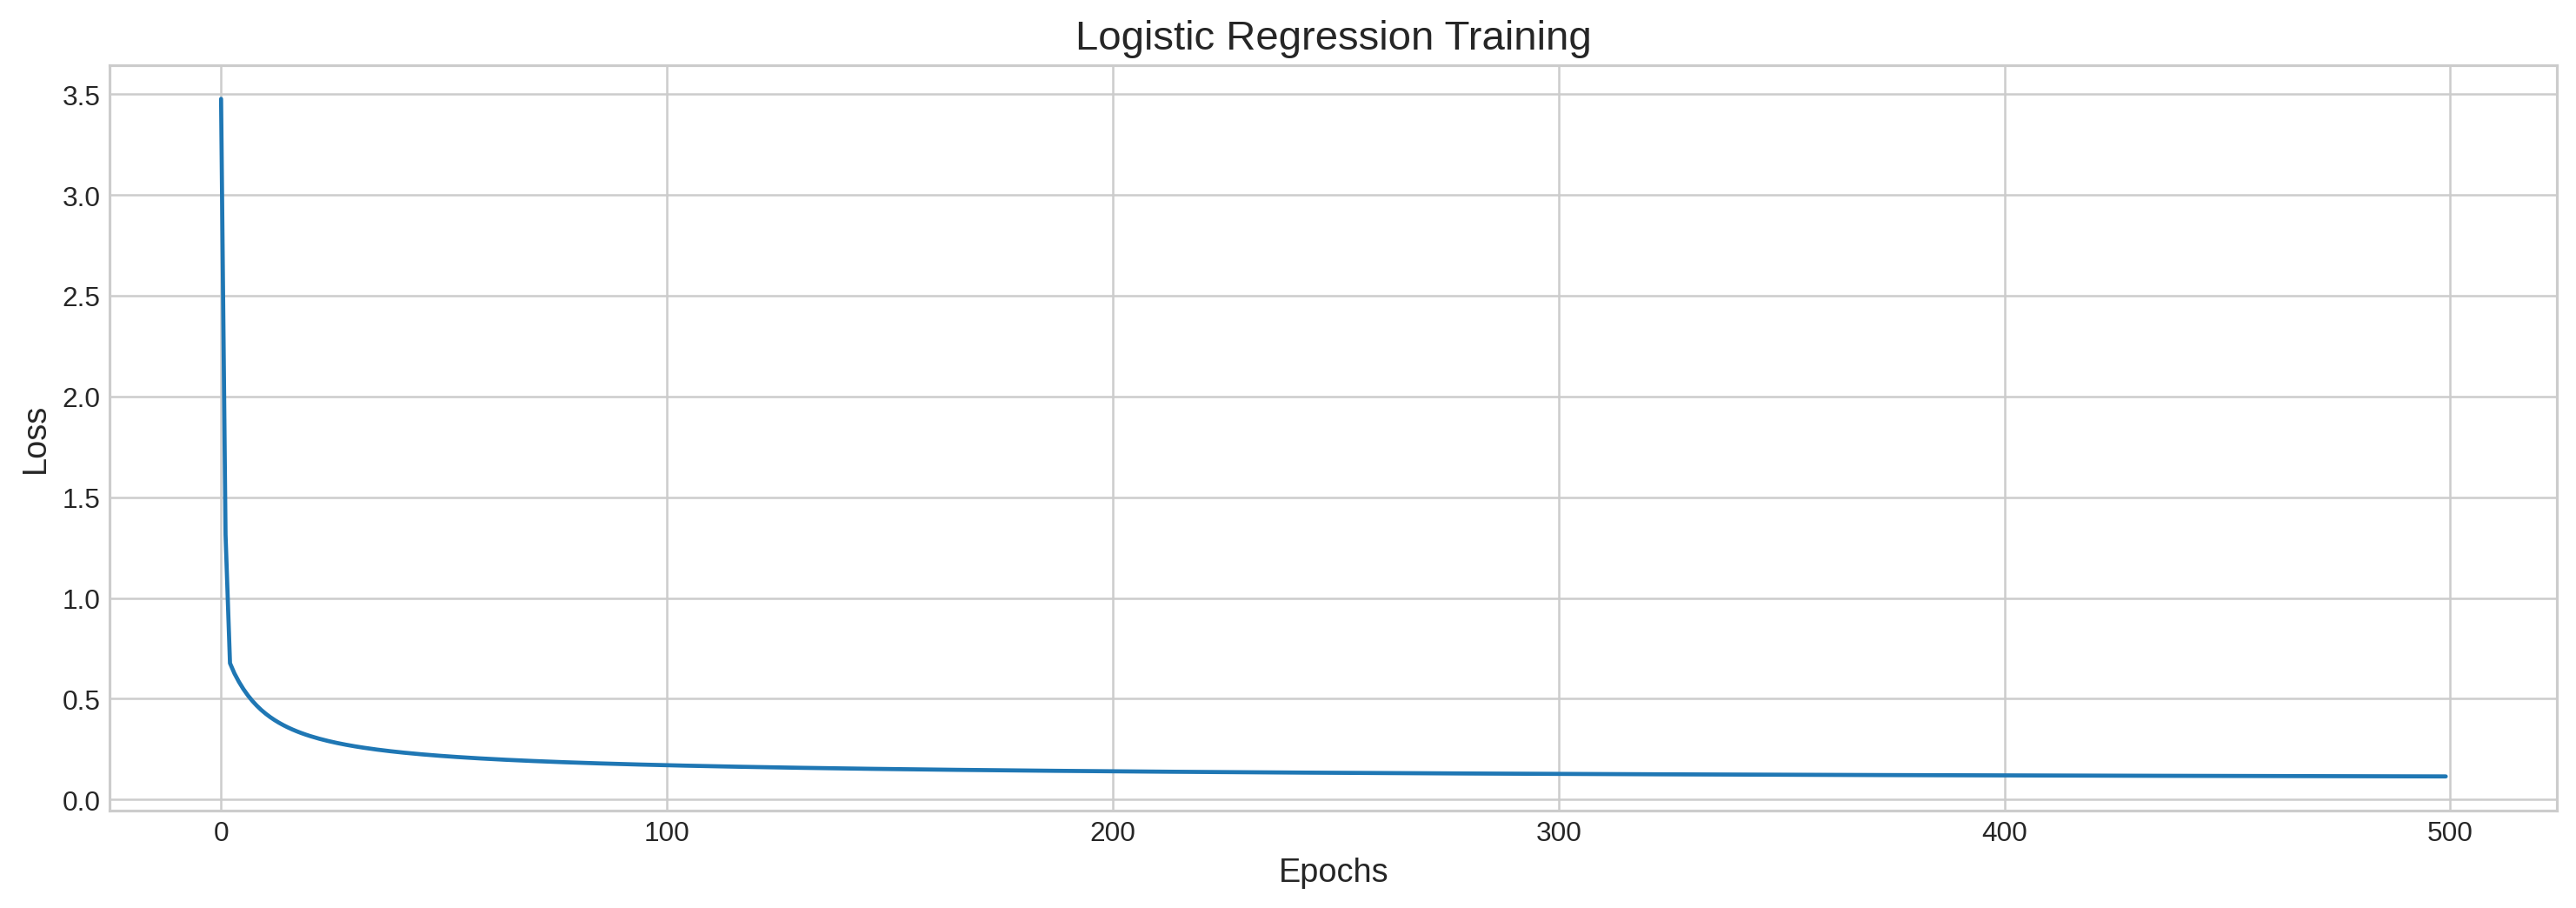

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.dpi'] = 227
plt.rcParams['figure.figsize'] = (16,5)
plt.plot(logreg.loss)
plt.title('Logistic Regression Training', fontSize=15)
plt.xlabel('Epochs', fontSize=12)
plt.ylabel('Loss', fontSize=12)
plt.show()